In [43]:
import pandas as pd
import numpy as np
from datetime import *
import psycopg2
from sqlalchemy import create_engine
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [44]:
conn_details = psycopg2.connect(
   host="data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com",
   database="pagila",
   user="de8_jige15",
   password="CBdwk29)",
   port= '5432'
)

cursor = conn_details.cursor()

In [46]:
def wordcloud(df):
  text_combined = ''
  for row in df['title']:
    text_combined += row + ''

  if text_combined != '':
    wordcloud = WordCloud(max_font_size=40).generate(text_combined)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


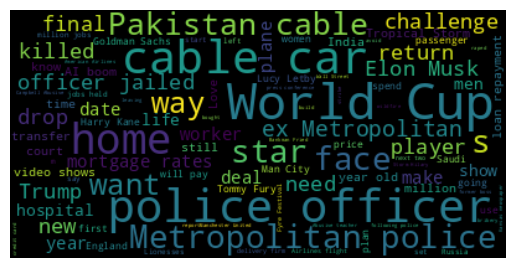

In [47]:
content_query = ''' SELECT * FROM student.jbg_content '''
cursor.execute(content_query)
results = cursor.fetchall()

content_df = pd.DataFrame(results, columns = ['content_id','title', 'url'])

text = ~content_df.title.str.contains('GMT')
all_content_df = content_df[text]

wordcloud(all_content_df)

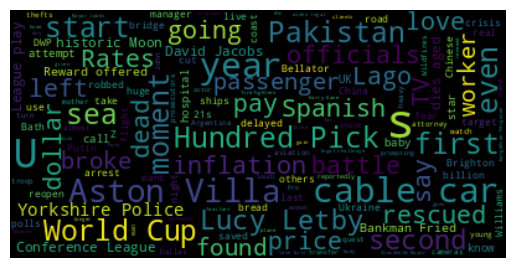

In [48]:
content_query = ''' SELECT ct.* FROM student.jbg_content ct
                    JOIN student.jbg_articles at on ct.content_id = at.content_id
                    JOIN student.jbg_datetime dt on at.datetime_id = dt.datetime_id
                    WHERE date(dt.published_at) = (current_date - INTERVAL '1 day')::date
                '''
cursor.execute(content_query)
results = cursor.fetchall()

daily_content_df = pd.DataFrame(results, columns = ['content_id','title', 'url'])

text = ~daily_content_df.title.str.contains('GMT')
daily_content_df = daily_content_df[text]

wordcloud(daily_content_df)

In [49]:
def barchart(df):
  df.plot.bar(x = 'news_source', y='no_of_articles',rot = 45, color='orange', title = "Number of articles per news source")

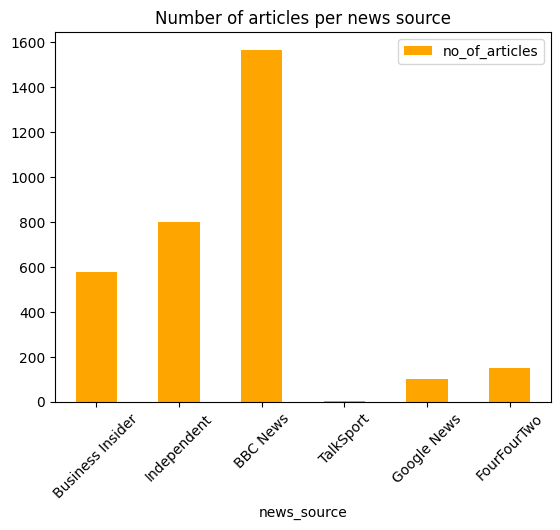

In [50]:
source_query = ''' SELECT news_domain_name,COUNT(at.*)
                  FROM student.jbg_newssource ns
                  JOIN student.jbg_articles at
                  ON ns.news_source_id = at.news_source_id
                  GROUP BY news_domain_name;
                '''
cursor.execute(source_query)
results = cursor.fetchall()

source_df = pd.DataFrame(results, columns = ['news_source','no_of_articles'])

barchart(source_df)

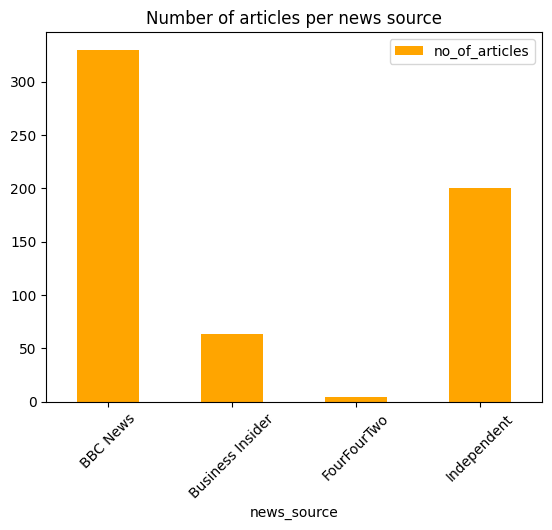

In [51]:
source_query = ''' SELECT news_domain_name,COUNT(at.*)
                  FROM student.jbg_newssource ns
                  JOIN student.jbg_articles at
                  ON ns.news_source_id = at.news_source_id
                  join student.jbg_datetime dt
                  on at.datetime_id = dt.datetime_id
                  where date(dt.published_at) = (current_date - INTERVAL '1 day')::date
                  GROUP BY news_domain_name;
                '''
cursor.execute(source_query)
results = cursor.fetchall()

daily_source_df = pd.DataFrame(results, columns = ['news_source','no_of_articles'])
barchart(daily_source_df)

In [52]:
cursor.close()
conn_details.close()